<a href="https://colab.research.google.com/github/jaskiratkalra26/zomato-stock-prediction/blob/main/zomato_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('zomato_new.csv')
df.head(5)
df.rename(columns={'Price':'Close','Vol.':'Volume'},inplace=True)
df['Volume'] = df['Volume'].str.replace('M','').astype('float32')
df.tail(10)

,Date,Close,Open,High,Low,Volume,Change %
886,06-08-2021,131.35,135.50,136.20,130.10,31.980000,-2.67%
887,05-08-2021,134.95,138.75,138.90,132.00,38.439999,-2.49%
888,04-08-2021,138.40,139.80,141.00,135.25,41.130001,-0.72%
889,03-08-2021,139.40,137.00,140.80,137.00,46.610001,-0.21%
890,02-08-2021,139.70,135.75,140.75,135.15,66.910004,4.64%
891,30-07-2021,133.50,142.60,142.70,131.00,88.309998,-5.69%
892,29-07-2021,141.55,134.95,144.00,132.20,117.970001,7.89%
893,28-07-2021,131.20,131.00,135.00,123.55,159.789993,-1.28%
894,27-07-2021,132.90,141.70,147.80,127.75,240.339996,-5.51%
895,26-07-2021,140.65,126.35,143.75,125.30,249.720001,11.63%


<Axes: ylabel='Close'>

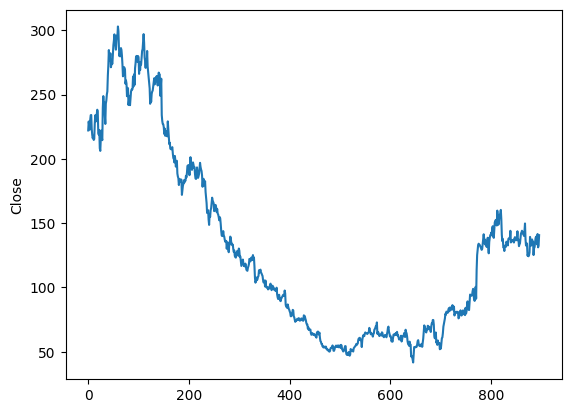

In [2]:
sns.lineplot(df['Close'])

<Axes: ylabel='Volume'>

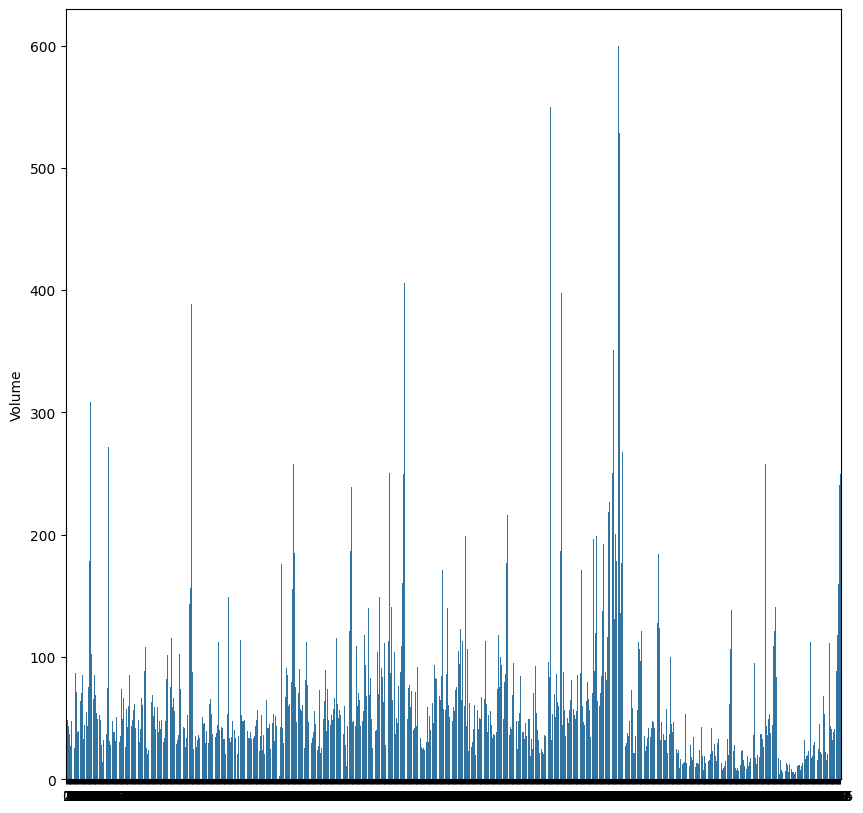

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.barplot(df['Volume'])

In [4]:
df = df.drop(['Date','Change %'],axis=1)
df.head(5)

,Close,Open,High,Low,Volume
0,222.10,226.00,228.46,217.82,115.470001
1,229.04,226.00,229.74,225.05,33.849998
2,225.63,224.20,230.18,223.05,48.480000
3,222.69,219.98,227.80,219.98,43.340000
4,230.36,233.00,238.73,228.87,36.770000


In [5]:
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()

,0
Close,0
Open,0
High,0
Low,0
Volume,0


**Classification Model**



---








In [6]:
df['Y'] = np.where(df['Close'].shift(-1)>df['Close'],1,0)
df.head(5)

,Close,Open,High,Low,Volume,Y
0,222.10,226.00,228.46,217.82,115.470001,1
1,229.04,226.00,229.74,225.05,33.849998,0
2,225.63,224.20,230.18,223.05,48.480000,0
3,222.69,219.98,227.80,219.98,43.340000,1
4,230.36,233.00,238.73,228.87,36.770000,1


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Open','High','Low','Close','Volume']] = scaler.fit_transform(df[['Open','High','Low','Close','Volume']])
df.head(5)


,Close,Open,High,Low,Volume,Y
0,0.690586,0.701724,0.707107,0.693213,0.188449,1
1,0.717145,0.701724,0.712025,0.721494,0.051654,0
2,0.704095,0.694902,0.713715,0.713671,0.076174,0
3,0.692843,0.678908,0.704572,0.701662,0.067559,1
4,0.722197,0.728255,0.746562,0.736437,0.056548,1


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Y',axis=1),df['Y'],test_size=0.1)
x_train

,Close,Open,High,Low,Volume
438,0.096441,0.101004,0.091817,0.101115,0.096655
365,0.218523,0.233276,0.223204,0.218658,0.147287
375,0.203023,0.196703,0.194391,0.203403,0.140247
614,0.079985,0.083949,0.072224,0.084686,0.102253
224,0.574627,0.571347,0.574721,0.586544,0.033620
...,...,...,...,...,...
162,0.654076,0.632746,0.651556,0.649364,0.060805
779,0.343092,0.341671,0.338456,0.349697,0.020732
261,0.432836,0.430169,0.436035,0.424017,0.128901
569,0.099694,0.104415,0.097580,0.105222,0.095683


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model = keras.Sequential([
    keras.layers.Dense(200,input_shape = (5,),activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100,activation = 'relu'),
     keras.layers.Dropout(0.2),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])
model.compile(optimizer = optimizer, loss = 'binary_crossentropy',metrics = ['accuracy'])
model.fit(x_train,y_train,epochs = 100)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.4757 - loss: 0.6940
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4872 - loss: 0.6935
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5104 - loss: 0.6927
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4950 - loss: 0.6928
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5182 - loss: 0.6906
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5116 - loss: 0.6910
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5171 - loss: 0.6913
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5470 - loss: 0.6906
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5389 - loss: 0.6899
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5357 - loss: 0.6902
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5274 - loss: 0.6915
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [10]:
model.evaluate(x_test,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.5078 - loss: 0.6808


[0.6875416040420532, 0.5]

**Regression Model**

---



In [11]:
df['Y_reg'] = df['Close'].shift(-1)
df.head(5)
df = df.dropna()
df.head(5)

,Close,Open,High,Low,Volume,Y,Y_reg
0,0.690586,0.701724,0.707107,0.693213,0.188449,1,0.717145
1,0.717145,0.701724,0.712025,0.721494,0.051654,0,0.704095
2,0.704095,0.694902,0.713715,0.713671,0.076174,0,0.692843
3,0.692843,0.678908,0.704572,0.701662,0.067559,1,0.722197
4,0.722197,0.728255,0.746562,0.736437,0.056548,1,0.735859


In [12]:
df = df.drop('Y',axis=1)
df.head(5)


,Close,Open,High,Low,Volume,Y_reg
0,0.690586,0.701724,0.707107,0.693213,0.188449,0.717145
1,0.717145,0.701724,0.712025,0.721494,0.051654,0.704095
2,0.704095,0.694902,0.713715,0.713671,0.076174,0.692843
3,0.692843,0.678908,0.704572,0.701662,0.067559,0.722197
4,0.722197,0.728255,0.746562,0.736437,0.056548,0.735859


In [13]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Y_reg',axis=1),df['Y_reg'],test_size=0.1)
x_train

,Close,Open,High,Low,Volume
786,0.366437,0.352473,0.361122,0.362996,0.014112
602,0.062763,0.064241,0.057050,0.066106,0.102739
90,0.821661,0.857116,0.870150,0.829845,0.112174
301,0.313624,0.317036,0.309643,0.319969,0.061191
716,0.161692,0.157855,0.168652,0.162527,0.083733
...,...,...,...,...,...
877,0.373708,0.356642,0.372839,0.361432,0.085074
690,0.089170,0.064810,0.089128,0.067671,0.319361
35,0.770379,0.773356,0.776028,0.769998,0.085124
467,0.044585,0.050028,0.037649,0.048699,0.041213


In [21]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
n_input = 3
n_features = 5
generator = TimeseriesGenerator(x_train,y_train,length=n_input,batch_size=1)
generator[0]



(array([[[0.36643705, 0.352473  , 0.36112178, 0.36299628, 0.01411189],
         [0.06276311, 0.06424105, 0.05704956, 0.066106  , 0.10273858],
         [0.82166093, 0.85711579, 0.87014983, 0.82984549, 0.11217444]]]),
 array([0.31572905]))

In [28]:
model_reg = keras.Sequential([
    keras.layers.LSTM(128,input_shape = (3,5),activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model_reg.compile(optimizer = 'adam', loss = 'mse',metrics = ['mae'])
model_reg.fit(generator,epochs = 30)

Epoch 1/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0969 - mae: 0.2438
Epoch 2/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0766 - mae: 0.2274
Epoch 3/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0795 - mae: 0.2363
Epoch 4/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0748 - mae: 0.2248
Epoch 5/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0812 - mae: 0.2385
Epoch 6/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0817 - mae: 0.2396
Epoch 7/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0754 - mae: 0.2277
Epoch 8/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0764 - mae: 0.2301
Epoch 9/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0709 - mae: 0.2195
Epoch 10/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0771 - mae: 0.2304
Epoch 11/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0783 - mae: 0.2323
Epoch 12/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0784 - mae: 0.2273
Epoch 13/30
801/801 ━━━━━

In [30]:
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
gen_test = TimeseriesGenerator(x_test,y_test,length=n_input,batch_size=1)
model_reg.evaluate(gen_test)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0692 - mae: 0.2136


[0.07496486604213715, 0.21454086899757385]